Reload configuration
---------
First reload everything as before.

In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy
import sys
import os
sys.path.append(os.getcwd())
import regressiondemo as rd

##############################
#      Customize the demo here
#      =======================
# the "true" function of x with range fixed at [0,10]
def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(numpy.absolute(x))/3.3

#  when fitting goes wild, need to constrain what y's are plotted
#  must be compatible with "true" function
ydisplaymin = -1.8
ydisplaymax = 1.8

#  don't make points more than 100 as demo is O(points^3)
points = 30

#  noise level (std.dev)
rd.setSigma(0.2)
##############################


x = rd.makeX(points)
#  build the true values matching the sampled data
y = rd.addNoise(truefunc(x))

# xts and yts store the "true" function for the purposes of plotting
# these have to be high frequency to make the resultant plot look
# like a smooth curve
xts = rd.makeX(200,uniform=True)
yts = truefunc(xts)

#  build a set of polynomial orders to use to fit
orders = rd.makeOrders(points)

# make canvas size a bit bigger (in inches)
bigcanvas = [8,6]

An ensemble of fits
---------
So we have seen how the two algorithms behave with different data sets of the same size.  So lets now fix the data set and ask a different question.  What different fits could reasonably match the finite sample of data we actually have?  This is a very important question in practice.  For learning, this is the classical "what if" scenario:  I don't know the real curve and only have a finite amount of data.  Within the assumptions of my algorithm, and fitting the data I have, what different fits are realistic?  What variability is there? What are range of possibilities? 

This is the motivation behind generating an *ensemble* of functions to match our data.  Averaging predictions over an [ensemble](https://en.wikipedia.org/wiki/Ensemble_learning) turns out to be one of the best ways of improving on a particular method for doing prediction.  What is needed is an additional method for generating the ensemble.

Using statistical methods, we can attempt to create an ensemble in a number of ways:  working with random subsets of features; making some random choices in the algorithm, or using a variety of different algorithms.  Bayesian non-parametric methods generate ensembles relatively easily (in theory, that is).  One runs a simulation, a so-called, Monte Carlo sampler, to generate different fits.  We do this below.


Step 3.1:  Testing ensembles
-----------
So rerun this plot with different data set sizes (*points*) to look at the ensembles produced.  Try from, say, 10 upwards and look at the change in variability of the lines.

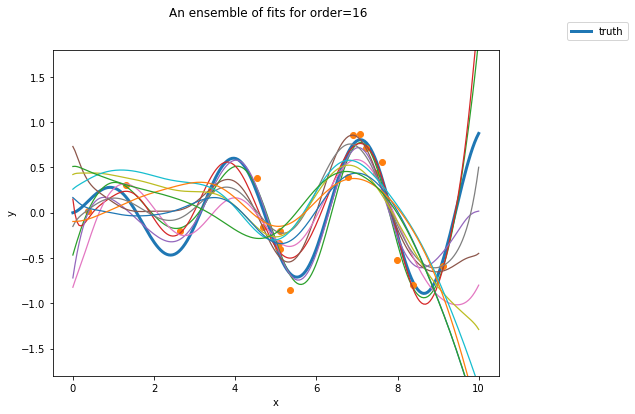

In [2]:
##############################
#      Customize the demo here
#      =======================
#  change points here if you want to see effect of different sample sizes
points = 20
samples = 10
##############################

# generate new data (x,y)
order = rd.maxOrder(points)
x = rd.makeX(points)
y = rd.addNoise(truefunc(x))

# make canvas size a bit bigger (in inches)
pl.figure(figsize=bigcanvas)

pl.plot(xts, yts,label = 'truth', linewidth=3.0)
#   can be handy to modify the point size for data, 
#   use 2,4,6 depending on data set size
pl.plot(x, y, 'o', markersize=6.0) 
pl.ylabel('y')
pl.xlabel('x')
        
legpoly = rd.LegPoly(order)
# we do the first fit as before, and plot it
legpoly.fit(x,y)
ys = legpoly.apply(xts)  
pl.plot(xts, ys, linewidth=1.25 )  

for i in range(samples):
    # now, subsequently, we sample a new curve
    legpoly.sample(y)
    #  build the fitted poly curve 
    ys = legpoly.apply(xts)  

    #  plot fitted curve
    pl.plot(xts, ys, linewidth=1.25 )  
    
#  the y range for the plot has to be altered depending on the data
pl.ylim(ydisplaymin,ydisplaymax)

# move the legend out of the way
# the (1.2, 1.2) starts the legend at the location relative to
# the top right corner
pl.legend(bbox_to_anchor=(1.3, 1.1))
pl.suptitle('An ensemble of fits for order='+str(order))